# 1. 필요한 패키지 import와 사진 준비하기

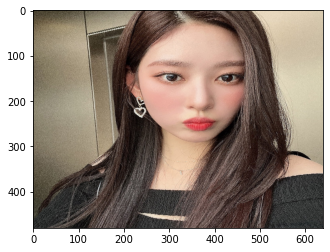

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/minju_1.jpg'
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 읽는다.
img_bgr = cv2.resize(img_bgr, (640, 480))    # 이미지를 Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 카피
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # openvb는 BGR를 사용하기 떄문에 RGB로 변경해주어야함
plt.imshow(img_rgb)
plt.show()

# 2. 얼굴 찾기

rectangles[[(230, 82) (498, 350)]]


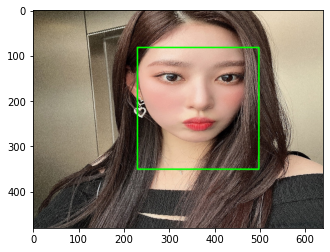

In [2]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # dlib을 활용해 hog detector를 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # dlib은 rgb 이미지를 입력으로 받음
dlib_rects = detector_hog(img_rgb, 1)   # detector를 이용해서 얼굴의 bounding box를 추출

print(dlib_rects)   # 얼굴 영역 좌표 출력

# 이미지 위에 얼굴의 bounding box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 3. 얼굴 랜드마크하기

In [3]:
# landmark 모델을 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 개별 위치 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))   # 68개의 (x,y) 튜플로 이루어진 리스트

68


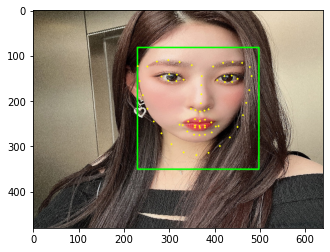

In [4]:
# 이미지에 landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 4. 스티커 적용

4-1. 스티커 위치 및 크기 계산

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 중심점 좌표 확인(nose center index: 30)
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))  # 스티커의 위치 (x,y)
    print ('(w,h) : (%d,%d)'%(w,h))  # 스티커의 크기 (w,h)

(370, 205)
(x,y) : (370,205)
(w,h) : (269,269)


4-2. 스티커 resize & 좌표 조정

(269, 269, 3)


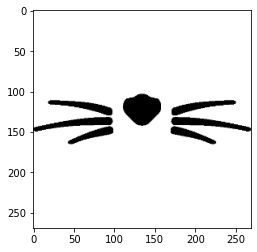

In [6]:
# 스티커 이미지를 읽어와 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [7]:
# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (236,71)


4-3. 스티커 적용

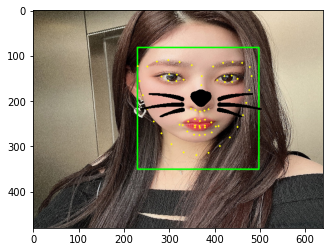

In [8]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

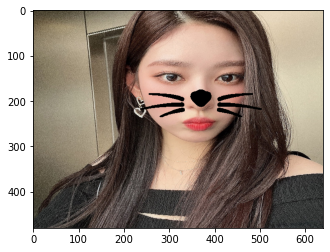

In [9]:
# bounding box와 landmark를 제거하고 최종 결과 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 img_rgb 사용
plt.show()

# 5. 다양한 이미지 테스트

rectangles[[(529, 156) (591, 218)]]


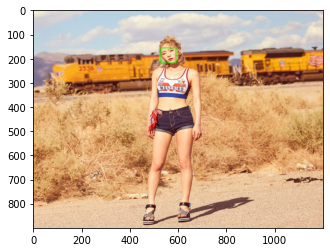

In [18]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/taeyeon.jpg'
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (1200, 900))    # Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 카피

# Face Detection
detector_hog = dlib.get_frontal_face_detector()   # dlib을 활용해 hog detector를 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # dlib은 rgb 이미지를 입력으로 받음
dlib_rects = detector_hog(img_rgb, 1)   # detector를 이용해서 얼굴의 bounding box를 추출

print(dlib_rects)   # 얼굴 영역 좌표 출력

# 이미지 위에 얼굴의 bounding box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

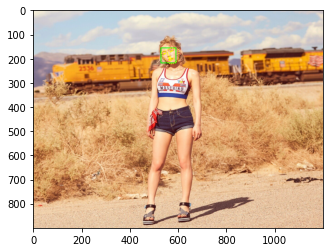

In [11]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 개별 위치 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 이미지에 landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [12]:
# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 중심점 좌표 확인(nose center index: 30)
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))  # 스티커의 위치 (x,y)
    print ('(w,h) : (%d,%d)'%(w,h))  # 스티커의 크기 (w,h)

# 스티커 이미지를 읽어와 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(560, 188)
(x,y) : (560,188)
(w,h) : (63,63)
(x,y) : (529,157)


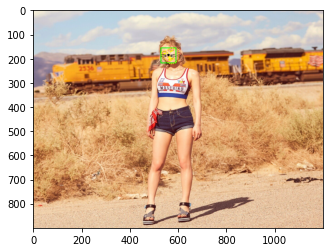

In [13]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

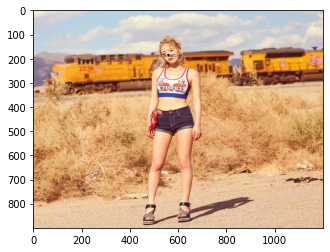

In [19]:
# bounding box와 landmark를 제거하고 최종 결과 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 img_rgb 사용
plt.show()

멀리 서있는 경우의 이미지는 Resize를 적당히 해주어야 한다. 배 부분에 얼굴이 인식되거나, 아예 인식이 안되기도 하였다. 그래서 적절한 크기로 해주어야 한다. 

In [15]:
from IPython.display import Image

다양한 이미지 적용 결과
![group](images/result1.png)
![group](images/result2.png)
![group](images/result2.JPG)

# 아이돌사진을 쓴 이유
카메라를 제일 잘보는 직업군이기도 하고, 여러각도에서 다양한 연출이 가능한 직업군이라서 선택하였다.

※ resize 여러번 시도함 ※

# 1. 다양한 각도 연출 및 특수상황부여(1,2,5,6,9,10번 사진) 

1번사진: 머리카락이 얼굴 절반을 가리고 있다라는 조건을 주었다. 얼굴 인식이 가려진 안경으로 인식이 되었다.

2번사진: 고개를 약간 사선상태에서 아래를 보고있는 조건을 주었다. 얼굴 인식이 제대로 되면서 스티커를 붙여줄수 있었다.

5번사진: 얼굴을 완전 측면을 보고 있는 조건을 주었다. 얼굴인식이 되지 않았으며, 다른 위치에 인식이 되며 스티커가 붙었다.
아마 다른 방법이 있지 않을까? 추후에 다시 한번 해보아야겠다.

6번사진: 누워있는 상황을 부여했다. 인식을 제대로 하지 못하였으며 다른위치에 스티커가 부착되었다.

9번사진: 사진 앵글이 다르다는 조건을 주었고, 완전 측면이 아닌 약간 사선상태에서 정면을 보고있다라는 조건을 주었다. 
         랜드마크 30번위치가 보여서 그런지 몰라도 제대로 인식이 되었으며 정상적으로 되었다.

10번사진: 옆으로 누워있는 조건을 주었다. 제대로 인식을 하지 못함

# 2. 얼굴자체에 조건 부여(3,4,8번 사진)

3번사진: 마스크를 끼고 있는 조건을 주었다. 인식은 하지만 약간은 아쉽게 빗겨나간 상태에서 스티커가 붙어버렸다.

4번,8번사진: 선글라스를 끼고 있는 조건을 주었다. 처음 8번사진은 사진 resize를 작게 해서 인식이 안되었다가. 크기를 늘리니까                잘 인식되었다. resize 첫 설정은 참 중요하다.

# 3. 어두운 백그라운드(7번, 11번 사진)

7번사진: 배경자체를 어둡게 주며 인물에게 핀라이트가 떨어지게끔 연출을 했다. 하지만 인식을 하지 못했다. 내 생각엔 핀라이트 조명이 문제인거 같기도 하며, 얼굴 반은 조명이 비추고 있고 반은 그림자를 지고 있어서 아마도 인식을 하지 못한것 같다.

11번사진: 어두운배경에 흑인여성을 조건주었다. 이목구비만 또렷하게 나온다면 문제되지 않고 얼굴인식을 하며 스티커가 잘 적용 되었다.

# 정리
스티커를 붙이는 과정은 단순했지만, 밝기, 각도 등 많은 변수들이 존재해서 아직 많이 부족하다고 느낀 과제였다.

요즘은 어플이 잘 되어있어서 해당 문제점들이 보완은 되었지만 앞으로 더 공부해야겠다라고 느꼈다.

만약 현재의 코드로 다수의 인물에게 스티커를 달아준다면?한명만 인식되지 않나 싶다. 모든 인물에게 랜드마크와 스티커 적용이 될 수 있도록 반복적인 코드가 필요하기 때문이다.

사실 사진만 잘 선택한다면 아무런 문제없이 잘 적용이 될 것이다.

다음엔 움직이는 gif파일이나 mp4 파일로도 해보고싶다.